# Neural Networks Deliverable

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
# Importing the data

data = pd.read_csv("db.csv")
X = data.iloc[:,0:7]
y = data.iloc[:,8]
random_state = np.random.RandomState(10)
n_samples, n_features = X.shape
X = X + (random_state.randn(n_samples, n_features))
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=3)
#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Question 1 & 3
Fit the data using a single neural network with 1 hidden layer of 500 neurons. For fitting, try using different numbers of epochs. Try values on the range of 1 to 100. (If this is taking too long, try every other number, or every third number.) Plot out the train and test set accuracies. In one to two sentences, what pattern do you see? In one sentence, why is this pattern happening?

In the graph bellow we see that there is a small improvement in the test accuracy as the number of epochs increases to start with, but very quickly the test accuracy (blue line) starts to decrease even if the train accuracy keeps on improving. This is due to the model overfitting.

With regards to the loss function, as expected it goes down and converges towards 0. This is because the neural network is trained to reduce the loss function at at every epoch. 

In [4]:
# Running the neural network and testing to see how changing the number of epochs affects our model.

from sklearn.neural_network import MLPClassifier

epochs = []
score = []
loss = []
train_score = []


for i in range(1, 101):
    NN_model = MLPClassifier(hidden_layer_sizes = (500), solver = ('lbfgs'), max_iter=i)
    NN_model.fit(X_train, y_train)
    loss.append(NN_model.loss_)
    train_score.append(NN_model.score(X_train, y_train))
    score.append(NN_model.score(X_test, y_test))
    epochs.append(i)

df = pd.DataFrame({'epochs':epochs, 'score':score, 'train_score':train_score, 'loss':loss})

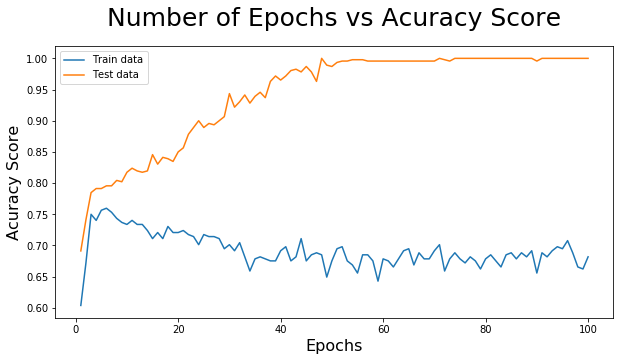

In [10]:
# Plotting the Number of Epochs vs the acuracy score:

plt.rcParams['figure.figsize'] = (10,5)

plt.plot(df['epochs'], df['score'])
plt.plot(df['epochs'], df['train_score'])
plt.xlabel('Epochs', size = 16)
plt.ylabel('Acuracy Score', size = 16)
plt.title('Number of Epochs vs Acuracy Score', size = 25, pad=20)
plt.legend(['Train data', 'Test data'])

Text(0.5, 1.0, 'Number of Epochs vs Loss function')

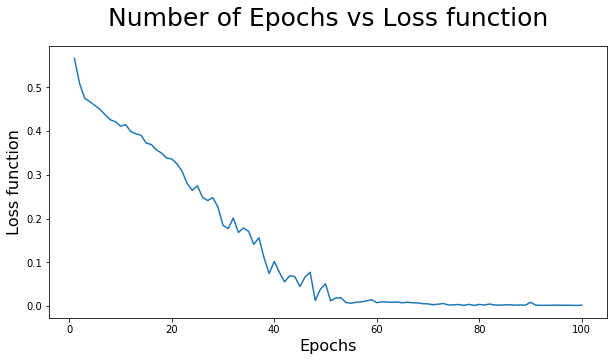

In [11]:
# Plogging epochs vs loss function

plt.rcParams['figure.figsize'] = (10,5)

plt.plot(df['epochs'], df['loss'])
plt.xlabel('Epochs', size = 16)
plt.ylabel('Loss function', size = 16)
plt.title('Number of Epochs vs Loss function', size = 25, pad=20)

## Question 2 & 3
Fit a single-layer neural network using the default number of epochs. Try using various numbers of neurons in this hidden layer, (we suggest 10, 20, 30, ... , 500). If this is taking too long you can increase the step size. Plot out the train and test set accuracies. In one to two sentences, what pattern do you see? In one sentence, why is this pattern happening?

Again We don't see much improvement as the number of Neurons increase mainly because the data base is too small and the train acuracy converges to 1 very quickly. This implies that the data is overfitting again.

In [12]:
# Running the neural network and testing to see how changing the number of epochs affects our model.

from sklearn.neural_network import MLPClassifier

neurons = []
train_score = []
score = []
loss = []

for i in range(10, 500, 10):
    
    NN_model = MLPClassifier(hidden_layer_sizes = (i), solver = ('lbfgs'))
    NN_model.fit(X_train, y_train)
    loss.append(NN_model.loss_)
    train_score.append(NN_model.score(X_train, y_train))
    score.append(NN_model.score(X_test, y_test))
    neurons.append(i)

df = pd.DataFrame({'neurons':neurons, 'train_score':train_score, 'score':score, 'loss':loss})

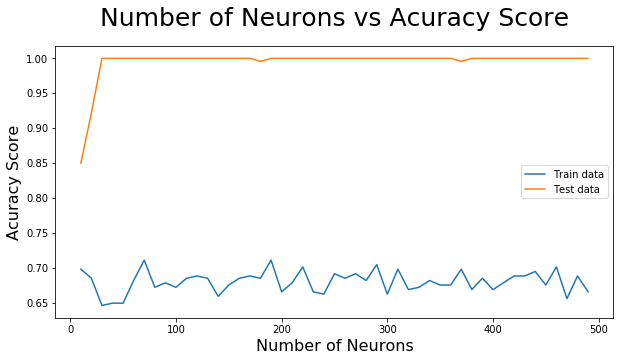

In [13]:
# Plogging the data frame epochs vs acuracy score

plt.rcParams['figure.figsize'] = (10,5)

plt.plot(df['neurons'], df['score'])
plt.plot(df['neurons'], df['train_score'])
plt.xlabel('Number of Neurons', size = 16)
plt.ylabel('Acuracy Score', size = 16)
plt.title('Number of Neurons vs Acuracy Score', size = 25, pad=20)
plt.legend(['Train data', 'Test data'])

Text(0.5, 1.0, 'Number of Neurons vs Acuracy Score')

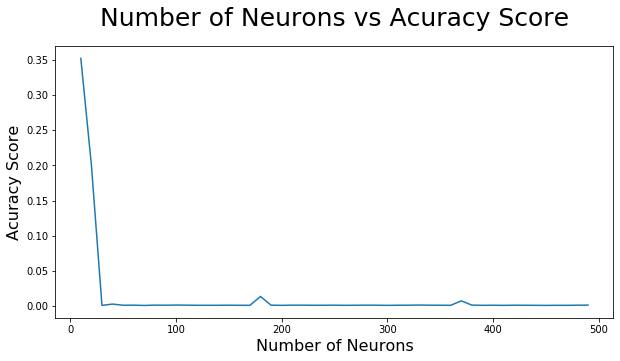

In [14]:
# Plogging the data frame epochs vs acuracy score

plt.rcParams['figure.figsize'] = (10,5)

plt.plot(df['neurons'], df['loss'])
plt.xlabel('Number of Neurons', size = 16)
plt.ylabel('Acuracy Score', size = 16)
plt.title('Number of Neurons vs Acuracy Score', size = 25, pad=20)